In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
what = {0:"T-shirt/top",
        1:"Trouser",
        2:"Pullover",
        3:"Dress",
        4:"Coat",
        5:"Sandal",
        6:"Shirt",
        7:"Sneaker",
        8:"Bag",
        9:"Ankle boot"}

In [20]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [21]:
x_train.shape

(60000, 28, 28)

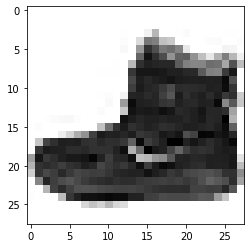

'Ankle boot'

In [22]:
plt.imshow(x_train[0], plt.cm.binary)
plt.show()
what[int(y_train[0])]

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [24]:
x_train.shape

(60000, 28, 28, 1)

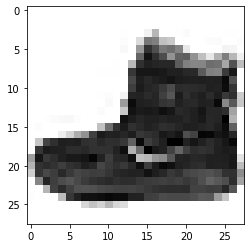

'Ankle boot'

In [25]:
plt.imshow(x_train[0], plt.cm.binary)
plt.show()
what[int(y_train[0])]

In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.5579 - accuracy: 0.8025
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3692 - accuracy: 0.8715
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3280 - accuracy: 0.8842
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3039 - accuracy: 0.8912
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2827 - accuracy: 0.8996


In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               1384704   
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

In [48]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.2667 - accuracy: 0.9029
0.26671314239501953
0.902899980545044


In [49]:
model.save('fashion_classify.model')

INFO:tensorflow:Assets written to: fashion_classify.model\assets


In [50]:
new_model = tf.keras.models.load_model('fashion_classify.model')

In [51]:
predictions = new_model.predict(x_test)

In [52]:
import numpy as np
cnt = 0;
for i in range(len(y_test)):
    if np.argmax(predictions[i]) == y_test[i]:
        cnt = cnt + 1
print("accuracy: ",cnt/len(y_test))

accuracy:  0.9029
